In [1]:
import pandas as pd

In [2]:
#loading the dataset
df=pd.read_csv("Diabetes.csv")
df.head()

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable (0 or 1)
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [34]:
#We need to separate the columns into dependent (Outcome or label data ) 
#and independent variables ( Eight features). 
#X contains independent variable and y contains dependent variable.
#Then we will split these variables into train and test set.
#To split train and test set we will import train_test_split function.


from sklearn.model_selection import train_test_split
#dependent and independent variables
feature_cols = ['Number of times pregnant','Plasma glucose concentration a 2 hours in an oral glucose tolerance test','Diastolic blood pressure (mm Hg)','Triceps skin fold thickness (mm)','2-Hour serum insulin (mu U/ml)','Body mass index (weight in kg/(height in m)^2)','Diabetes pedigree function','Age (years)']
X=df[feature_cols]
y=df[["Class variable (0 or 1)"]]

In [35]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=1)

In [36]:
# train a Decision Tree Classifier model on the training set
from sklearn.tree import DecisionTreeClassifier

# instantiate model
dtree= DecisionTreeClassifier()

# fit model
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [37]:
# make class predictions for the testing set
y_pred_class = dtree.predict(X_test)

In [38]:
# calculate accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))

0.6948051948051948


In [39]:
# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_test, y_pred_class)
print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

[[78 21]
 [26 29]]


In [40]:
#Classification Accuracy:
# use float to perform true division, not integer division
print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, y_pred_class))

0.6948051948051948
0.6948051948051948


In [41]:
#Classification Error:
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)
print(1 - metrics.accuracy_score(y_test, y_pred_class))

0.3051948051948052
0.30519480519480524


In [42]:
#Sensitivity: 
sensitivity = TP / float(FN + TP)

print(sensitivity)
print(metrics.recall_score(y_test, y_pred_class))

0.5272727272727272
0.5272727272727272


In [43]:
#Specificity:
specificity = TN / (TN + FP)

print(specificity)

0.7878787878787878


In [44]:
#Precision:
precision = TP / float(TP + FP)

print(precision)
print(metrics.precision_score(y_test, y_pred_class))

0.58
0.58


In [45]:
# Recall:
recall= TP/float(TP + FN)
print(recall)

0.5272727272727272


In [46]:
#f-score:
fscore=2/((1/recall)+(1/precision))
fscore

0.5523809523809523

In [47]:
test_pred= dtree.predict(X_test)
metrics.accuracy_score(test_pred,y_pred_class)

1.0

In [48]:
#Prediction for Test set and accuracy.
print(metrics.classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.75      0.79      0.77        99
           1       0.58      0.53      0.55        55

    accuracy                           0.69       154
   macro avg       0.67      0.66      0.66       154
weighted avg       0.69      0.69      0.69       154



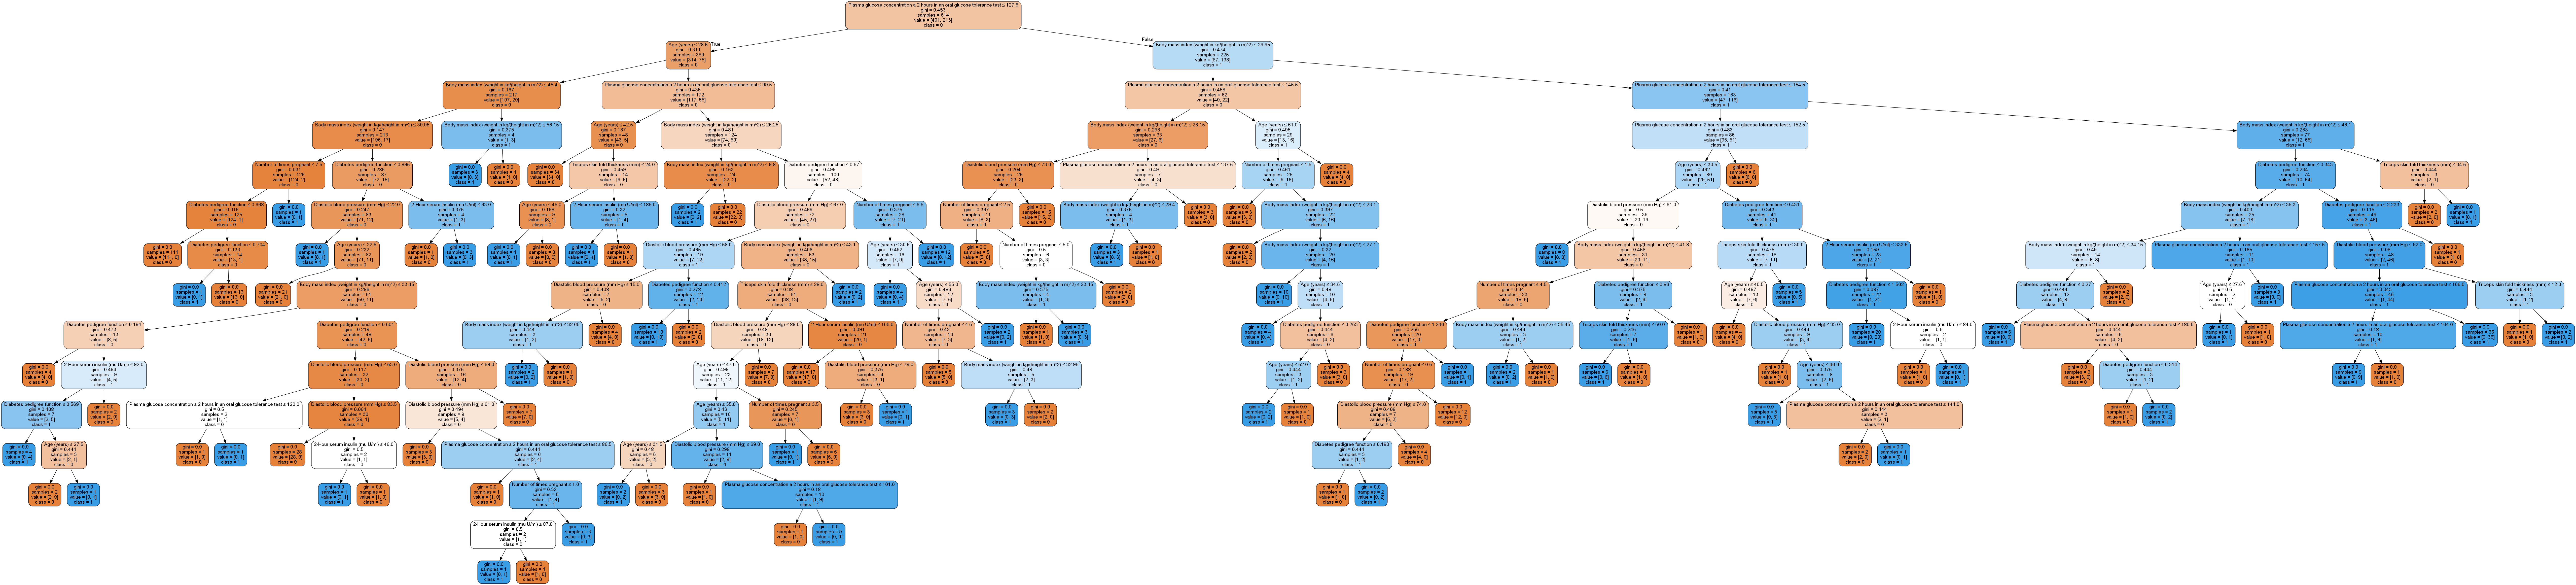

In [50]:
from six import StringIO
from sklearn.tree import export_graphviz
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())


In [31]:
conda install -c conda-forge pydotplus

Note: you may need to restart the kernel to use updated packages.

Solving environment: ...working... done





==> WARNING: A newer version of conda exists. <==
  current version: 4.9.2
  latest version: 4.10.0

## Package Plan ##

  environment location: C:\Users\Lenovo\anaconda3

  added / updated specs:
    - pydotplus


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.10.0               |   py38haa244fe_1         3.1 MB  conda-forge
    graphviz-2.38              |       hfd603c8_2        29.3 MB
    pydotplus-2.0.2            |             py_2          23 KB  conda-forge
    python_abi-3.8             |           1_cp38           4 KB  conda-forge
    ------------------------------------------------------------
                                           Total:        32.4 MB

The following NEW packages will be INSTALLED:

  graphviz           pkgs/main/win-64::graphviz-2.38-hfd603c8_2
  pydotplus          conda-forge/noarch::pydotplus-2.0.2-py_2
  python_abi         conda-forge/win-64::python_abi-3.8-1_cp38

The following packages will be UPDATED:

  conda               pkgs/main::c



Please update conda by running

    $ conda update -n base -c defaults conda


